In [61]:
import pandas as pd

data = pd.read_csv('data/Alcohol_Sales.csv.xls')
print('Начало:', data.iloc[0].DATE)
print('Конец:', data.iloc[-1].DATE)
years = 26

Начало: 1992-01-01
Конец: 2019-01-01


In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def holt_winters(ts, alpha, beta, gamma, seasonal_periods, max_seasons=None):
    all_seasons = int(len(ts)/seasonal_periods)
    #print(season_len)
    level = ts[0]
    trend = np.mean(np.diff(ts[:seasonal_periods]))
    seasonals = np.zeros(seasonal_periods)

    forecast = np.zeros(len(ts))

    for i in range(len(ts)):
        if max_seasons != None:
            if i > seasonal_periods*max_seasons:
                break
        value = ts[i]
        last_level, level = level, alpha * (value - seasonals[i % seasonal_periods]) + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        seasonals[i % seasonal_periods] = gamma * (value - level) + (1 - gamma) * seasonals[i % seasonal_periods]
        forecast[i] = level + trend + seasonals[i % seasonal_periods]
        if max_seasons != None:
            print(f'Iteration {i}')
            print('Level: ', level)
            print('Trend: ', trend)
            print('Seasonal: ', seasonals[i % seasonal_periods])
            if (i!= 0) & (i % seasonal_periods == 0):
                print('Forecast:', forecast[forecast!=0][-seasonal_periods:])
    return forecast

In [96]:
seasonal_periods = 12
data = pd.read_csv('data/Alcohol_Sales.csv.xls').iloc[:,1]
f = holt_winters(data, 0.2, 0.2, 0.2, seasonal_periods, 1)

Iteration 0
Level:  3566.4181818181823
Trend:  128.9018181818183
Seasonal:  -21.48363636363647
Iteration 1
Level:  3647.8560000000007
Trend:  119.40901818181831
Seasonal:  -37.97120000000014
Iteration 2
Level:  3814.2120145454555
Trend:  128.79841745454564
Seasonal:  37.55759709090889
Iteration 3
Level:  4067.208345600001
Trend:  153.6380001745456
Seasonal:  99.35833087999981
Iteration 4
Level:  4220.877076619638
Trend:  153.64414634356382
Seasonal:  0.024584676072481673
Iteration 5
Level:  4405.416978370561
Trend:  159.82329742503578
Seasonal:  24.716604325887786
Iteration 6
Level:  4545.392220636478
Trend:  155.85368639321197
Seasonal:  -15.878444127295552
Iteration 7
Level:  4588.396725623752
Trend:  133.28385011202442
Seasonal:  -90.2793451247504
Iteration 8
Level:  4602.544460588621
Trend:  109.45662708259343
Seasonal:  -95.30889211772428
Iteration 9
Level:  4621.400870136972
Trend:  91.33658357574488
Seasonal:  -72.48017402739443
Iteration 10
Level:  4618.189962970174
Trend:  72.

In [97]:
def mse(params, ts, seasonal_periods):
    alpha, beta, gamma = params
    forecast = holt_winters(ts, alpha, beta, gamma, seasonal_periods)
    mse = np.mean((ts - forecast)**2)
    return mse

# Начальные параметры для оптимизации
initial_params = [0.2, 0.2, 0.2]

# Оптимизация параметров
result = minimize(mse, initial_params, args=(data, seasonal_periods), method='L-BFGS-B')

# Получение оптимальных параметров
optimal_params = result.x
print(optimal_params)

[0.07588584 0.15910205 1.00298461]


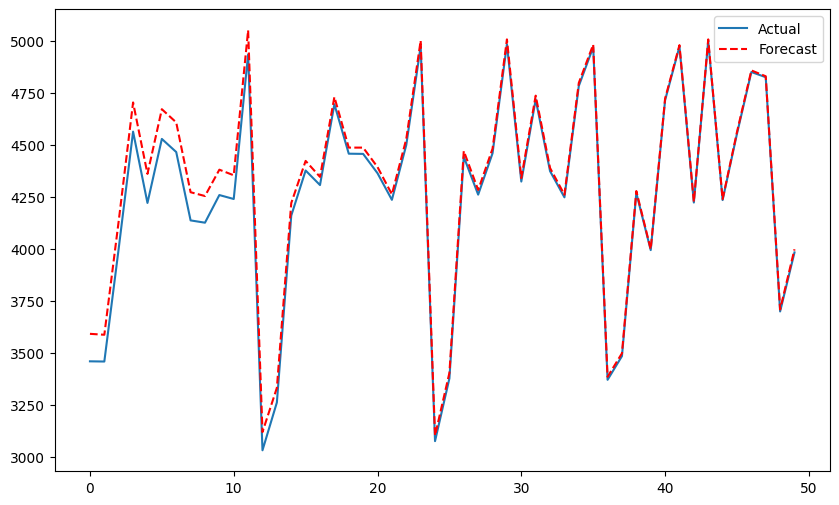

In [98]:
# Прогноз с использованием оптимальных параметров
forecast = holt_winters(data, *optimal_params, seasonal_periods)

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(data[:50], label='Actual')
plt.plot(forecast[:50], label='Forecast', linestyle='dashed', color='red')
plt.legend()
plt.show()